In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teleco = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
teleco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
teleco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
teleco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
monthly = teleco.groupby("gender")["MonthlyCharges"].sum()    # monthly charges
monthly

,MonthlyCharges
gender,
Female,227432.4
Male,228684.2


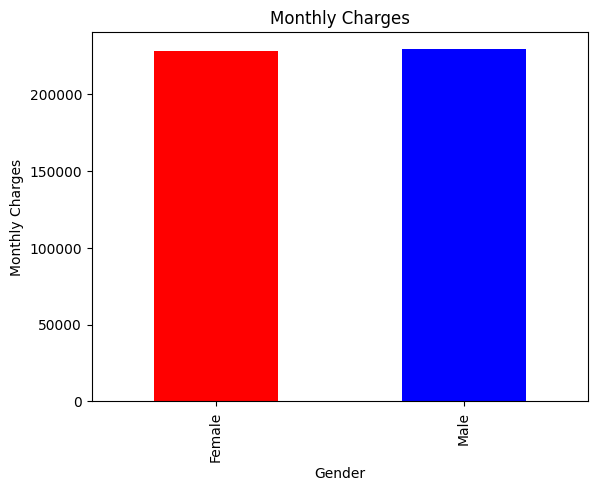

In [6]:
colors = ["red","blue"]
monthly.plot(kind = "bar",color = colors)
plt.xlabel("Gender")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges")
plt.show()

In [7]:
movies =teleco.groupby(["gender","SeniorCitizen","Partner"])["StreamingMovies"].value_counts()   # streaming movies by gender and seniorcitizen and partner
movies

gender  SeniorCitizen  Partner  StreamingMovies    
Female  0              No       No                     662
                                Yes                    483
                                No internet service    335
                       Yes      Yes                    596
                                No                     453
                                No internet service    391
        1              No       No                     164
                                Yes                    146
                                No internet service     10
                       Yes      Yes                    146
                                No                      91
                                No internet service     11
Male    0              No       No                     697
                                Yes                    467
                                No internet service    428
                       Yes      Yes                    591
                                No                     478
                                No internet service    320
        1              No       No                     119
                                Yes                    115
                                No internet service     15
                       Yes      Yes                    188
                                No                     121
                                No internet service     16
Name: count, dtype: int64

In [8]:
tv = teleco.groupby(["gender","SeniorCitizen","Partner"])["StreamingTV"].value_counts()  # streaming tv by gender
tv

gender  SeniorCitizen  Partner  StreamingTV        
Female  0              No       No                     682
                                Yes                    463
                                No internet service    335
                       Yes      Yes                    600
                                No                     449
                                No internet service    391
        1              No       No                     163
                                Yes                    147
                                No internet service     10
                       Yes      Yes                    145
                                No                      92
                                No internet service     11
Male    0              No       No                     701
                                Yes                    463
                                No internet service    428
                       Yes      Yes                    609
                                No                     460
                                No internet service    320
        1              No       No                     121
                                Yes                    113
                                No internet service     15
                       Yes      Yes                    167
                                No                     142
                                No internet service     16
Name: count, dtype: int64

In [9]:
gender  = teleco["gender"].value_counts()   # gender count
gender

,count
gender,
Male,3555
Female,3488


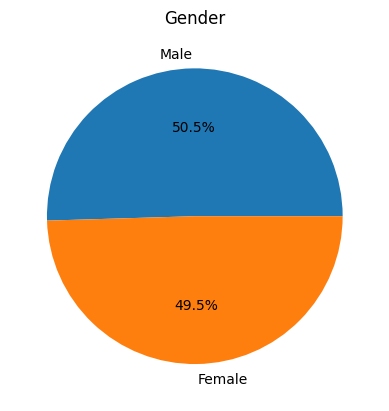

In [10]:
plt.pie(gender, labels = gender.index, autopct = "%1.1f%%")
plt.title("Gender")
plt.show()

In [11]:
senior = teleco["SeniorCitizen"].value_counts()   # senior citizen counts
senior

,count
SeniorCitizen,
0,5901
1,1142


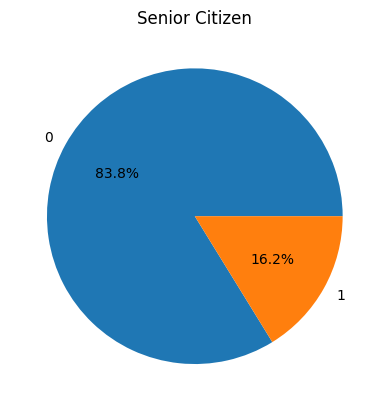

In [12]:
plt.pie(senior, labels = senior.index, autopct = "%1.1f%%")
plt.title("Senior Citizen")
plt.show()


In [13]:
partner = teleco.groupby("gender")["Partner"].value_counts()
partner

gender  Partner
Female  No         1800
        Yes        1688
Male    No         1841
        Yes        1714
Name: count, dtype: int64

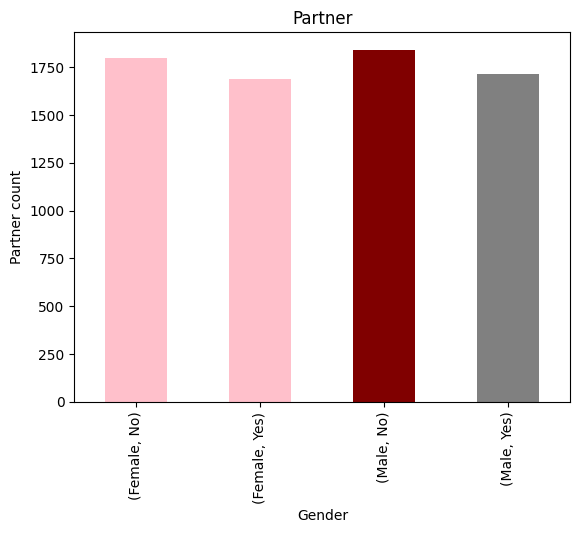

In [14]:
colors = ["pink","pink","maroon","grey"]
partner.plot(kind = "bar", color = colors)
plt.xlabel("Gender")
plt.ylabel("Partner count")
plt.title("Partner")
plt.show()

In [15]:
dependents = teleco.groupby("gender")["Dependents"].value_counts()    # gender dependents
dependents

gender  Dependents
Female  No            2460
        Yes           1028
Male    No            2473
        Yes           1082
Name: count, dtype: int64

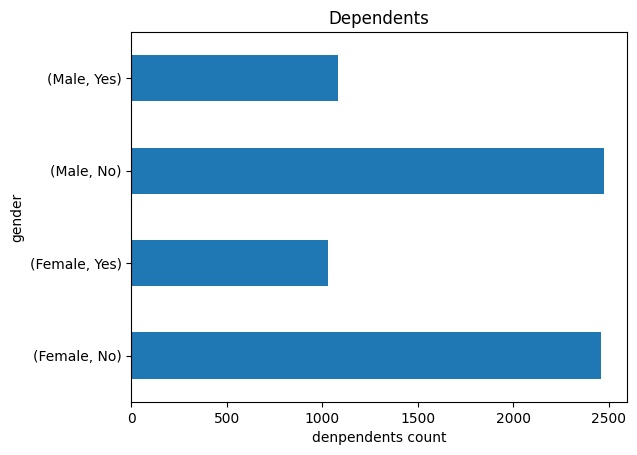

In [16]:
dependents.plot(kind = "barh")
plt.xlabel("denpendents count")
plt.ylabel("gender")
plt.title("Dependents")
plt.show()

In [17]:
phone = teleco.groupby("gender")["PhoneService"].value_counts()   # gender phone service
phone

gender  PhoneService
Female  Yes             3157
        No               331
Male    Yes             3204
        No               351
Name: count, dtype: int64

In [18]:
line = teleco.groupby("gender")["MultipleLines"].value_counts()   # gender has multipleline connection
line

gender  MultipleLines   
Female  No                  1671
        Yes                 1486
        No phone service     331
Male    No                  1719
        Yes                 1485
        No phone service     351
Name: count, dtype: int64

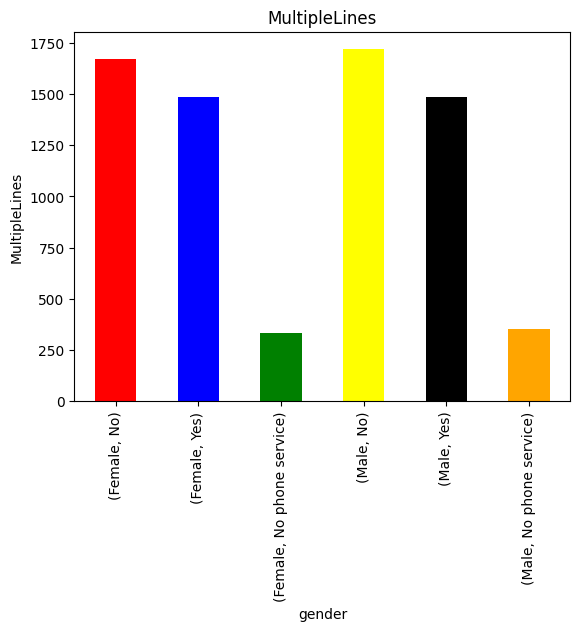

In [19]:
colors = ["red","blue","green","yellow","black","orange"]
line.plot(kind = "bar",color = colors)
plt.xlabel("gender")
plt.ylabel("MultipleLines")
plt.title("MultipleLines")
plt.show()

In [20]:
internet = teleco.groupby(["gender","Partner"])["InternetService"].value_counts()    # gender has internetservice
internet

gender  Partner  InternetService
Female  No       Fiber optic        837
                 DSL                618
                 No                 345
        Yes      Fiber optic        716
                 DSL                570
                 No                 402
Male    No       Fiber optic        763
                 DSL                635
                 No                 443
        Yes      Fiber optic        780
                 DSL                598
                 No                 336
Name: count, dtype: int64

In [21]:
contract = teleco.groupby(["gender","Partner"])["Contract"].value_counts()  # gender has contract policy
contract

gender  Partner  Contract      
Female  No       Month-to-month    1235
                 One year           322
                 Two year           243
        Yes      Month-to-month     690
                 Two year           602
                 One year           396
Male    No       Month-to-month    1260
                 One year           321
                 Two year           260
        Yes      Month-to-month     690
                 Two year           590
                 One year           434
Name: count, dtype: int64

In [22]:
payment = teleco.groupby(["gender","Partner"])["PaymentMethod"].value_counts()  # gender payments methods
payment

gender  Partner  PaymentMethod            
Female  No       Electronic check             699
                 Mailed check                 450
                 Credit card (automatic)      338
                 Bank transfer (automatic)    313
        Yes      Bank transfer (automatic)    475
                 Electronic check             471
                 Credit card (automatic)      414
                 Mailed check                 328
Male    No       Electronic check             663
                 Mailed check                 524
                 Credit card (automatic)      330
                 Bank transfer (automatic)    324
        Yes      Electronic check             532
                 Credit card (automatic)      440
                 Bank transfer (automatic)    432
                 Mailed check                 310
Name: count, dtype: int64

In [23]:
churn  = teleco["Churn"].value_counts()   # churn total
churn

,count
Churn,
No,5174
Yes,1869


In [24]:
churn_return = teleco.groupby("gender")["Churn"].value_counts()  # churn by gender
churn_return

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

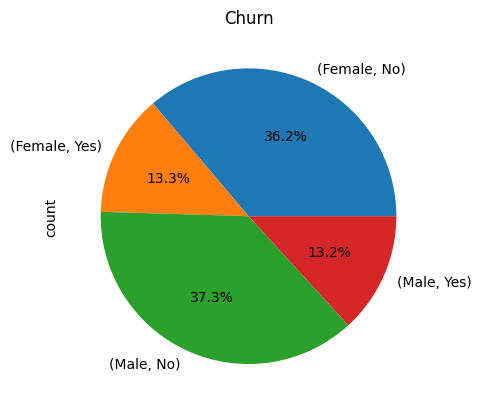

In [25]:
churn_return.plot(kind = "pie" ,autopct = "%1.1f%%")

plt.title("Churn")
plt.show()

In [26]:
Churn = teleco.groupby(["gender","SeniorCitizen","Partner"])["Churn"].value_counts()   # churn by gender and seniorcitizen
Churn

gender  SeniorCitizen  Partner  Churn
Female  0              No       No       1019
                                Yes       461
                       Yes      No       1202
                                Yes       238
        1              No       No        161
                                Yes       159
                       Yes      No        167
                                Yes        81
Male    0              No       No       1131
                                Yes       461
                       Yes      No       1156
                                Yes       233
        1              No       No        130
                                Yes       119
                       Yes      No        208
                                Yes       117
Name: count, dtype: int64

In [27]:
billing = teleco.groupby(["gender","Partner","SeniorCitizen"])["PaperlessBilling"].value_counts()  # paperless blling
billing

gender  Partner  SeniorCitizen  PaperlessBilling
Female  No       0              Yes                 863
                                No                  617
                 1              Yes                 244
                                No                   76
        Yes      0              Yes                 787
                                No                  653
                 1              Yes                 192
                                No                   56
Male    No       0              Yes                 886
                                No                  706
                 1              Yes                 189
                                No                   60
        Yes      0              Yes                 759
                                No                  630
                 1              Yes                 251
                                No                   74
Name: count, dtype: int64

# conclusion

1.this is telecom churn dataset which has 7043 rows and 21 columns.

2.Total Female	227432.4, Male	228684.2.

3.Senior citizen no - 5901 yes -1-	1142.

4.gender having partners (Female	No	1800 Yes	1688) (Male	No	1841,Yes	1714)

5.total churn  (No	5174 , Yes	1869) churn is very low in both genders.



